# Loading Image Data

In [1]:
import torch
from torchvision import datasets, transforms

import helper
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

The easiest way to load image data is with <code>datasets.ImageFolder</code> from <code>torchvision</code> (documentation). In general you'll use <code>ImageFolder</code> like so:

<code>dataset = datasets.ImageFolder('path/to/data', transform=transform)</code>
where <code>'path/to/data'</code> is the file path to the data directory and transform is a sequence of processing steps built with the transforms module from torchvision. ImageFolder expects the files and directories to be constructed like so:
    
    root/dog/xxx.png
    root/dog/xxy.png
    root/dog/xxz.png

    root/cat/123.png
    root/cat/nsdf3.png
    root/cat/asd932_.png

where each class has its own directory (`cat` and `dog`) for the images. The images are then labeled with the class taken from the directory name. So here, the image 123.png would be loaded with the class label `cat``
. You can download the dataset already structured like this from here. I've also split it into a training set and test set.

## Transforms

When you load in the data with `ImageFolder`, you'll need to define some transforms. For example, the images are different sizes but we'll need them to all be the same size for training. You can either resize them with `transforms.Resize()` or `crop with transforms.CenterCrop()`, `transforms.RandomResizedCrop()`, etc. We'll also need to convert the images to PyTorch tensors with `transforms.ToTensor()`. Typically you'll combine these transforms into `a pipeline with transforms.Compose()`, which accepts a list of transforms and runs them in sequence. It looks something like this to scale, then crop, then convert to a tensor:

    transform = transforms.Compose([transforms.Resize(255),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor()])
There are plenty of transforms available, I'll cover more in a bit and you can read through the documentation.

## Data Loaders

With the ImageFolder loaded, you have to pass it to a `DataLoader`. The DataLoader takes a dataset (such as you would get from ImageFolder) and `returns batches of images and the corresponding labels`. You can set various parameters like the batch size and if the data is shuffled after each epoch.

`dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)`
Here dataloader is a generator. To get data out of it, you need to loop through it or convert it to an iterator and call `next()`.

    # Looping through it, get a batch on each loop 
    for images, labels in dataloader:
        pass

    # Get one batch
    images, labels = next(iter(dataloader))

In [25]:
import os
path = '/Users/ceyhun/Downloads/Cat_Dog_data/train'
path2 = '/Users/ceyhun/Downloads/Cat_Dog_data'
os.listdir(path)

['cat', '.DS_Store', 'dog']

In [20]:
data_dir = path

transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])
dataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

<AxesSubplot:>

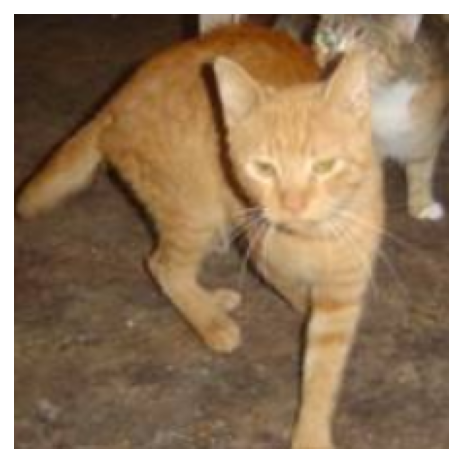

In [21]:
# Run this to test your data loader
images, labels = next(iter(dataloader))
helper.imshow(images[0], normalize=False)

## Data Augmentation

A common strategy for training neural networks is to introduce randomness in the input data itself. For example, you can randomly rotate, mirror, scale, and/or crop your images during training. This will help your network generalize as it's seeing the same images but in different locations, with different sizes, in different orientations, etc.

To randomly rotate, scale and crop, then flip your images you would define your transforms like this:

    train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                           transforms.RandomResizedCrop(224),
                                           transforms.RandomHorizontalFlip(),
                                           transforms.ToTensor(),
                                           transforms.Normalize([0.5, 0.5, 0.5], 
                                                                [0.5, 0.5, 0.5])])
You'll also typically want to normalize images with `transforms.Normalize`. You pass in a list of means and list of standard deviations, then the color channels are normalized like so

`input[channel] = (input[channel] - mean[channel]) / std[channel]`

Subtracting `mean` centers the data around zero and dividing by `std` squishes the values to be between -1 and 1. Normalizing helps keep the network weights near zero which in turn makes backpropagation more stable. Without normalization, networks will tend to fail to learn.

You can find a list of all the available transforms here. When you're testing however, you'll want to use images that aren't altered other than normalizing. So, for validation/test images, you'll typically just resize and crop.

In [26]:
data_dir = path2

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()]) 

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor()])


# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

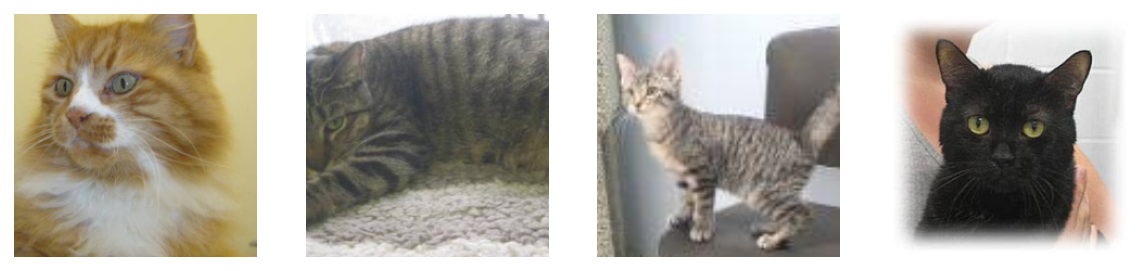

In [27]:
# change this to the trainloader or testloader 
data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)